 
> **”But don’t be satisfied with stories; how things have gone with others,
> <br>Unfold your own myth, without complicated explanation,
> <br>So everyone will understand the passage we have opened you.”**
<br>Mawlānā

# How Can a Wellness Technology Company Play It Smart?

This is the Capstone Project as the last part of the Google Data Analytics Professional Certificate that I have completed.



## Scenario
Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. 
In this report I am supposed to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will hopefully help guide marketing strategy for the company.
<br> I will present this report and my high-level recommendations to the Bellabeat executive team to be used for Bellabeat’s marketing strategy.



## Products

- **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

- **Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.

- **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.

- **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are
appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your
hydration levels.

- **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and
beauty, and mindfulness based on their lifestyle and goals.

## Characters and Key Stakeholders

- **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer (stakeholder)

- **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team (stakeholder)

- **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and
reporting data that helps guide Bellabeat’s marketing strategy


## 1- Ask

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has
asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain
insight into how people are already using their smart devices. Then, using this information, she would like high-level
recommendations for how these trends can inform Bellabeat marketing strategy.

The business task is to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices and in the next step, select one Bellabeat product to apply these insights to in a presentation. 
The following questions will be good guides to frame the analysis:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


## 2- Prepare
This dataset were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016 and 05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
<br>These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
<br>The business objective is to analyze smart device usage data to gain insight into how consumers use smart devices. This data has some limitations: It is quite outdated, and the sample size is relatively small. However, it lays the ground for further research, investigation, and analysis.

Before starting with the analysis data needs to be cleaned. The cleaning process:

- Removed unnecessary columns.
- Removed records for the dates not in the observation timeframe.
- Inconsistencies in the intensity_min data. For a few days the total amount of time sums up to more than 1440 min (a day).
- Removed dates with inconsistencies: 4.5.2016, 4.6.2016, 4.11.2016, 4.12.2016, 5.6.2016, 5.7.2016.
- Removed IDs not part of the sample.
- Changed the mismatched data types.
- Split date-time columns into two separate columns: date, time.
- Divided METs by 10 to get accurate values.
- Changed the dates format consistently throughout the dataset.
- Renamed the columns in a meaningful, user friendly way


## 3- Process
I am using Python to process data. I load each CSV file into a pandas dataframe, check its integrity and consistensy, merge it with other dataframes if necessary, and voila, the data is ready to answer a business question.
<br>The original data is not integrated, it is separated into two groups. One contains data from 12.3 to 11.4 and the other from 12.4 to 12.5. I use a default dictionary to keep the data and after reading all CSV files, merge the files to have one file for each dataset.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import defaultdict
import pickle


In [3]:
# Read the data
# Read all .csv files in the path, create a dataframe, and assign the name of the file to the dataframe

this_dir = Path(".").resolve()
print(f"Reading data from this path: {this_dir}\n")

dfs = defaultdict(list)

i = 1
for path in (this_dir).rglob("*.csv*"): # Read only csv files
    print(f'{i}- Reading {path.name}')
    df = pd.read_csv(path)
    
    name = path.name.split('_')[0]
    df.name = name
    # In all files, the first column is time.
    # I rename this column to 'Time' for consistency.
    # And change the type to datetime
    df.rename(columns={ df.columns[1]: "Time" }, inplace = True)
    df['Time'] = pd.to_datetime(df['Time'], format="mixed")
    
    dfs[name].append(df)
    i = i + 1
    # if i==6:
    #     break

print(f"\nRead {len(dfs)} CSV files.")


Reading data from this path: E:\Coursera\Mi Portfolio\How Can a Wellness Technology Company Play It Smart

1- Reading dailyActivity_merged.csv
2- Reading heartrate_seconds_merged.csv
3- Reading hourlyCalories_merged.csv
4- Reading hourlyIntensities_merged.csv
5- Reading hourlySteps_merged.csv
6- Reading minuteCaloriesNarrow_merged.csv
7- Reading minuteIntensitiesNarrow_merged.csv
8- Reading minuteMETsNarrow_merged.csv
9- Reading minuteSleep_merged.csv
10- Reading minuteStepsNarrow_merged.csv
11- Reading weightLogInfo_merged.csv
12- Reading dailyActivity_merged.csv
13- Reading dailyCalories_merged.csv
14- Reading dailyIntensities_merged.csv
15- Reading dailySteps_merged.csv
16- Reading heartrate_seconds_merged.csv
17- Reading hourlyIntensities_merged.csv
18- Reading hourlySteps_merged.csv
19- Reading minuteCaloriesNarrow_merged.csv
20- Reading minuteCaloriesWide_merged.csv
21- Reading minuteIntensitiesNarrow_merged.csv
22- Reading minuteIntensitiesWide_merged.csv
23- Reading minuteMETsN

### Pickle/Unpickle the dictionary of dataframes

In [4]:
# Pickle
with open('dfs.p', 'wb') as fp:
    pickle.dump(dfs, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
# Unickle
with open('dfs.p', 'rb') as fp:
    dfs = pickle.load(fp)
len(dfs)

18

### Explore the data
Some files e.g. dailyActivity, heartrate, and hourlyIntensities are present in both groups. While some others are present in only one group. Let's check.

In [3]:
for name, data in dfs.items():
    print(name, len(data), end='---')

dailyActivity 2---heartrate 2---hourlyCalories 1---hourlyIntensities 2---hourlySteps 2---minuteCaloriesNarrow 2---minuteIntensitiesNarrow 2---minuteMETsNarrow 2---minuteSleep 2---minuteStepsNarrow 2---weightLogInfo 2---dailyCalories 1---dailyIntensities 1---dailySteps 1---minuteCaloriesWide 1---minuteIntensitiesWide 1---minuteStepsWide 1---sleepDay 1---

### Merge the data
For the files that are present in both groups, we have to merge the two files into one.

In [3]:
merged = {key: pd.concat(value) for key, value in dfs.items()}
len(merged)

18

In [7]:
print(dfs['dailyActivity'][0].shape)
print(dfs['dailyActivity'][1].shape)
print(merged['dailyActivity'].shape)
print("Successful merge: ", (dfs['dailyActivity'][0].shape[0] + dfs['dailyActivity'][1].shape[0]) == merged['dailyActivity'].shape[0])


(457, 15)
(940, 15)
(1397, 15)
Successful merge:  True


### Deal with duplicates
In all dataframes we must have one and only one entry for each **(Id, Time)** pair. So we check and remove duplicates based on this criteria.

In [4]:
for name, df in merged.items():
    df.drop_duplicates(['Id','Time'], inplace=True)


### How many users do we have in the dataset?
It is mentioned in the documentation that 30 users agreed to be monitored during the data collection period. Let's check if this is correct.

In [6]:
ids = []
for df in merged.values():
    ids.extend(df['Id'].unique())
unique_ids = sorted(set(ids))
print(f"We have {len(unique_ids)} unique users in this dataset.")

We have 35 unique users in this dataset.


We have more users in the dataset than specified in the documentation. Let's check each user is present in how many dataframes. If a user is present in only one dataframe, we can conclude that it is a noise.

In [7]:
print("ID is present in # dataframes")
all_ids = pd.Series(ids)
print(all_ids.value_counts())

ID is present in # dataframes
6962181067    18
4558609924    18
2347167796    18
5577150313    18
7007744171    17
1503960366    17
8792009665    17
4445114986    17
4319703577    17
2026352035    17
1927972279    17
4702921684    17
5553957443    17
6775888955    17
6117666160    17
4020332650    17
1644430081    16
8877689391    16
1844505072    16
2022484408    16
8378563200    16
8053475328    16
7086361926    16
4388161847    16
2320127002    16
3977333714    16
8253242879    15
2873212765    15
1624580081    14
4057192912    14
3372868164    14
8583815059    14
6290855005    14
2891001357     9
6391747486     9
Name: count, dtype: int64


Now let's check how many unique users we have in each dataframe.

In [8]:
print("Unique users in each dataframe")
print("------------------------------")
for name, df in merged.items():
    print(name, df['Id'].nunique())

Unique users in each dataframe
------------------------------
dailyActivity 35
heartrate 15
hourlyCalories 34
hourlyIntensities 35
hourlySteps 35
minuteCaloriesNarrow 35
minuteIntensitiesNarrow 35
minuteMETsNarrow 35
minuteSleep 25
minuteStepsNarrow 35
weightLogInfo 13
dailyCalories 33
dailyIntensities 33
dailySteps 33
minuteCaloriesWide 33
minuteIntensitiesWide 33
minuteStepsWide 33
sleepDay 24


This exploration was not conclusive as most of our dataframes have 30+ unique users. So, the problem may be a typo in the documentation. Or let's check the dates to see if there is any datapoint out of the specified date interval.

In [5]:
from datetime import datetime

start = datetime(2016, 3, 12)
end = datetime(2016, 5, 13)

print("Dataframe     Min        Max")
print("________________________________")
for name, df in merged.items():
    almin = (df['Time'] >= start).all()
    almax = (df['Time'] < end).all()
    print(f"{name} {almin} {almax}")

Dataframe     Min        Max
________________________________
dailyActivity True True
heartrate True True
hourlyCalories True True
hourlyIntensities True True
hourlySteps True True
minuteCaloriesNarrow True True
minuteIntensitiesNarrow True True
minuteMETsNarrow True True
minuteSleep False True
minuteStepsNarrow True True
weightLogInfo True True
dailyCalories True True
dailyIntensities True True
dailySteps True True
minuteCaloriesWide True False
minuteIntensitiesWide True False
minuteStepsWide True False
sleepDay True True


So, some dataframes have datapoints out of the specified timeframe. Let's remove these entries and then check the number of unique users once again.

In [6]:
clean = {}
for name, df in merged.items():
    data = df[(df['Time'] >= start) & (df['Time'] < end)]
    clean[name] = data
    print(name, data['Id'].nunique())

dailyActivity 35
heartrate 15
hourlyCalories 34
hourlyIntensities 35
hourlySteps 35
minuteCaloriesNarrow 35
minuteIntensitiesNarrow 35
minuteMETsNarrow 35
minuteSleep 25
minuteStepsNarrow 35
weightLogInfo 13
dailyCalories 33
dailyIntensities 33
dailySteps 33
minuteCaloriesWide 33
minuteIntensitiesWide 33
minuteStepsWide 33
sleepDay 24


In [11]:
for name, df in clean.items():
    almin = (df['Time'] >= start).all()
    almax = (df['Time'] < end).all()
    print(f"{name} {almin} {almax}")

dailyActivity True True
heartrate True True
hourlyCalories True True
hourlyIntensities True True
hourlySteps True True
minuteCaloriesNarrow True True
minuteIntensitiesNarrow True True
minuteMETsNarrow True True
minuteSleep True True
minuteStepsNarrow True True
weightLogInfo True True
dailyCalories True True
dailyIntensities True True
dailySteps True True
minuteCaloriesWide True True
minuteIntensitiesWide True True
minuteStepsWide True True
sleepDay True True


Even after removing the duplicates and invalid dates, we have over 30 users in many of the dataframes. In a real-world scenario, I would ask the stakeholders, coleagues, data-owners, etc, and explore further to find the root of this inconsistency, but in this project, I can't easily reach out to these people and ask for any additional information. Besides that, my current exploration shows that all user IDs are valid and meaningful. So, let's call this discussion a day and assume that there is no issues with the number of users.
In case, we find that there is an issue with the number of users, I can modify my analysis to reflect the change. And I think the modification would not be so big.
<br> Let's finish this section with a short report of all dataframes.

In [15]:
for name, df in clean.items():
    print(f"Processing {name}")
    print(f"Unique days in the {name} dataframe: {df['Time'].dt.date.nunique()}")
    # print(f"Unique days in the {name} dataframe: {df['Time'].nunique()}")
    
    print(f"Min date in the {name} dataframe: {df['Time'].min()}")
    print(f"Max date in the {name} dataframe: {df['Time'].max()}")
    print(f"Unique users in the {name} dataframe: {df['Id'].nunique()}")
    print("\n")


Processing dailyActivity
Unique days in the dailyActivity dataframe: 62
Min date in the dailyActivity dataframe: 2016-03-12 00:00:00
Max date in the dailyActivity dataframe: 2016-05-12 00:00:00
Unique users in the dailyActivity dataframe: 35


Processing heartrate
Unique days in the heartrate dataframe: 45
Min date in the heartrate dataframe: 2016-03-29 00:00:05
Max date in the heartrate dataframe: 2016-05-12 16:20:00
Unique users in the heartrate dataframe: 15


Processing hourlyCalories
Unique days in the hourlyCalories dataframe: 32
Min date in the hourlyCalories dataframe: 2016-03-12 00:00:00
Max date in the hourlyCalories dataframe: 2016-04-12 10:00:00
Unique users in the hourlyCalories dataframe: 34


Processing hourlyIntensities
Unique days in the hourlyIntensities dataframe: 62
Min date in the hourlyIntensities dataframe: 2016-03-12 00:00:00
Max date in the hourlyIntensities dataframe: 2016-05-12 15:00:00
Unique users in the hourlyIntensities dataframe: 35


Processing hourlySt

## 4- Analyze

### How many days average user wears the device
The study lasted for 62 days. On average a user would wears the device for 39 days from 62. The standards deviation is 10 days and the median is 42. This means that half of the users wear the device 42 days and more, which is a promising number.
<br>To segment users, I divided the sample in 6 groups, at one standard deviation away from each other.

In [8]:
dailyActivity = clean['dailyActivity']
day_per_user = dailyActivity.groupby('Id').size()
print(f"Max days a users wears the device: {day_per_user.max()}")
print(f"Min days a users wears the device: {day_per_user.min()}")
print(f"Median days a users wears the device: {day_per_user.median()}")
print(f"Average days a users wears the device: {day_per_user.mean().round(2)}")
print(f"Standard deviation of days a users wears the device: {day_per_user.std()}")


Max days a users wears the device: 62
Min days a users wears the device: 8
Median days a users wears the device: 42.0
Average days a users wears the device: 39.23
Standard deviation of days a users wears the device: 9.490198393406667


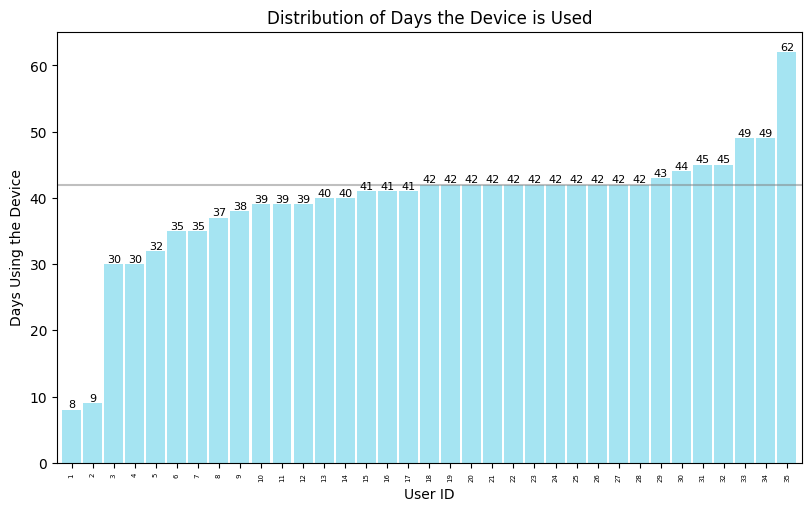

In [9]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
day_per_user.sort_values().plot.bar(ax=ax, color='#a5e4f2', width=0.9)
ax.set_xlabel('User ID')
ax.set_ylabel('Days Using the Device')
ax.set_title("Distribution of Days the Device is Used")
# ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.2)
ax.set_xticks(ticks=range(35), labels=range(1,36))
ax.xaxis.set_tick_params(labelsize=5)
ax.axhline(42, color='grey', alpha=0.5)  # median position
ax.bar_label(ax.containers[0], fontsize=8);

### How many active users per day?
On average 22 users use the device each day and in half of the days, 29+ users wear the device, both of which are really promising and show a good potential for even more growth through creative promotion.

In [10]:
dailyActivity = clean['dailyActivity']
user_per_day = dailyActivity.groupby(dailyActivity['Time']).size()
print(f"Max active users in a day: {user_per_day.max()}")
print(f"Min active users in a day: {user_per_day.min()}")
print(f"Median active users in a day: {user_per_day.median()}")
print(f"Average active users in a day: {user_per_day.mean()}")
print(f"Standard deviation of active users in a day: {user_per_day.std()}")


Max active users in a day: 35
Min active users in a day: 2
Median active users in a day: 29.0
Average active users in a day: 22.14516129032258
Standard deviation of active users in a day: 13.191958273444962


Number of active users increased considerably from two during the first days to 35 in the middle days then declined over time. This needs further investigation and we must ask users why they stopped using the app. Was there a technichal issue with the app, the device, or user?

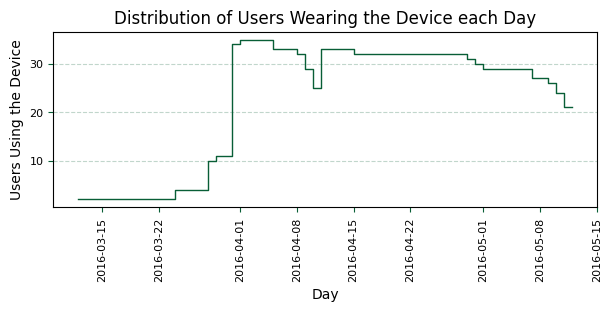

In [11]:

fig, ax = plt.subplots(figsize=(6,3), layout='constrained')
x = user_per_day.index
y = user_per_day.values
ax.step(x, y, linewidth=1, color='#085e36')
ax.set_xlabel('Day')
ax.set_ylabel('Users Using the Device')
ax.set_title("Distribution of Users Wearing the Device each Day")
ax.yaxis.grid(True, linestyle='--', which='major', color='#085e36', alpha=.25)
ax.xaxis.set_tick_params(labelsize=8, rotation=90, color='#085e36')
ax.yaxis.set_tick_params(labelsize=8, color='#085e36')


### Trend of using the app by weekday
Fridays have the most active users, while we have the fewest users during the weekend. It seems that people use the device as an accessory when they go to work.

In [12]:
days = pd.Series(pd.date_range(start='3/12/2016', end='5/12/2016')).dt.day_name()
weekdays = days.value_counts()
weekdays

Saturday     9
Sunday       9
Monday       9
Tuesday      9
Wednesday    9
Thursday     9
Friday       8
Name: count, dtype: int64

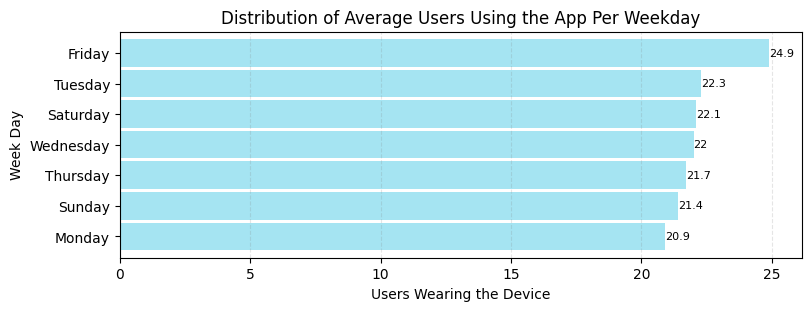

In [13]:
user_per_weekday = dailyActivity.groupby(dailyActivity['Time'].dt.day_name()).size()
user_per_weekday = (user_per_weekday / weekdays).round(1)

fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')
user_per_weekday.sort_values().plot.barh(ax=ax, color='#a5e4f2', width=0.9)
ax.set_xlabel('Users Wearing the Device')
ax.set_ylabel('Week Day')
ax.set_title("Distribution of Average Users Using the App Per Weekday")
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.2)
ax.bar_label(ax.containers[0], fontsize=8);

### How many hours a day users wear the device


In [8]:
hourlyIntensities = clean['hourlyIntensities'].copy()
hourlyIntensities['Date'] = hourlyIntensities['Time'].dt.date
hourlyIntensities['Time'] = hourlyIntensities['Time'].dt.hour
hourlyIntensities['Active'] = hourlyIntensities['TotalIntensity'] > 0
hourlyIntensities = hourlyIntensities.reindex(columns=['Id', 'Date', 'Time', 'TotalIntensity', 'AverageIntensity', 'Active'])
hourlyIntensities.head()

,Id,Date,Time,TotalIntensity,AverageIntensity,Active
0,1503960366,2016-03-12,0,0,0.0,False
1,1503960366,2016-03-12,1,0,0.0,False
2,1503960366,2016-03-12,2,0,0.0,False
3,1503960366,2016-03-12,3,0,0.0,False
4,1503960366,2016-03-12,4,0,0.0,False


On average users wear the device 13.5 hours a day. 50% of the users use it for 16 hours or more. We have some power users who use the device all day long. Maximum active hours per day is 24, this means that some users have the device with them all day long.

In [15]:
hour_per_user_per_day = hourlyIntensities.groupby(['Id', 'Date'])['Active'].sum()
print("Mean active hours per day:", hour_per_user_per_day.mean().round(2))
print("Median active hours per day:", hour_per_user_per_day.median())
print("Minimum active hours per day:", hour_per_user_per_day.min())
print("Maximum active hours per day:", hour_per_user_per_day.max())


Mean active hours per day: 13.43
Median active hours per day: 16.0
Minimum active hours per day: 0
Maximum active hours per day: 24


In [16]:
hour_per_user_per_day.shape

(1935,)

In aggregate, we have data for 1935 days.
- In 10.74% of days, users wear the deivec at least 20 hours a day.
- In 51.3% of days, users wear the deivec at least 16 hours a day.
- In 74.35% of days, users wear the device at least 12 hours a day.
- In 81.32% of days, users wear the device at least 8 hours a day.
- In 15.5% of days, users wear the device  at most 4 hours a day.

<br>In general, I believe that the duration of wearing the device is very good with a lot of potential to improve. It can be by improving the app, the device, the interaction, awareness and making the use of the device more rewarding using techniques like gamification or adding a touch of socialization to the app.
<br>As in other cases, we can cluster users to heavy, medium, light, and null groupbs based on their activities and ask each group about their pain points, gain points and any opportunities for improving the features and the experience of using the device and the app.

In [17]:
(hour_per_user_per_day.value_counts(normalize=True)*100).round(2).sort_index(ascending=False).cumsum()

Active
24     0.62
23     0.98
22     1.91
21     5.06
20    10.74
19    19.68
18    30.22
17    40.71
16    51.30
15    60.24
14    66.44
13    71.04
12    74.35
11    76.78
10    78.18
9     80.04
8     81.23
7     82.42
6     83.35
5     83.97
4     84.49
3     85.11
2     86.35
1     87.23
0     99.99
Name: proportion, dtype: float64

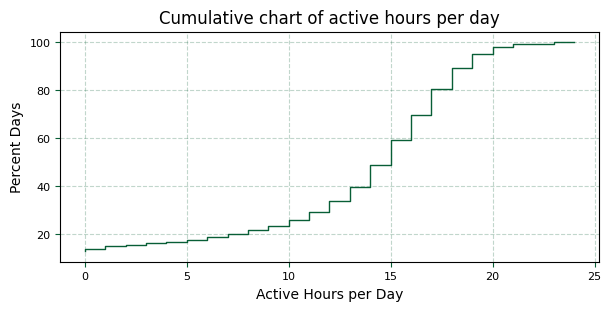

In [18]:
hpu = (hour_per_user_per_day.value_counts(normalize=True)*100).round(2).sort_index().cumsum()

fig, ax = plt.subplots(figsize=(6,3), layout='constrained')
x = hpu.index
y = hpu.values
ax.step(x, y, linewidth=1, color='#085e36')
ax.set_xlabel('Active Hours per Day')
ax.set_ylabel('Percent Days')
ax.set_title("Cumulative chart of active hours per day")
ax.yaxis.grid(True, linestyle='--', which='major', color='#085e36', alpha=.25)
ax.xaxis.grid(True, linestyle='--', which='major', color='#085e36', alpha=.25)

ax.xaxis.set_tick_params(labelsize=8, color='#085e36')
ax.yaxis.set_tick_params(labelsize=8, color='#085e36')


### How many active users in each hour of each day
Not surprisingly, on average users are more active from 6 am. to 11 pm. This means that a small proportion of users wear the device during the night when they sleep. This reinforces the hypothesis that they use the device mainly during working hours and days. In other words, they see the device as an accessory to be worn when they go out, not a tool to monitor their health every day and hour.

In [25]:
user_per_hour_per_day = pd.DataFrame(hourlyIntensities.groupby(['Date', 'Time'])['Active'].sum())
user_per_hour_per_day.reset_index(inplace=True)
# user_per_hour_per_day.head()

<Axes: xlabel='Time', ylabel='Date'>

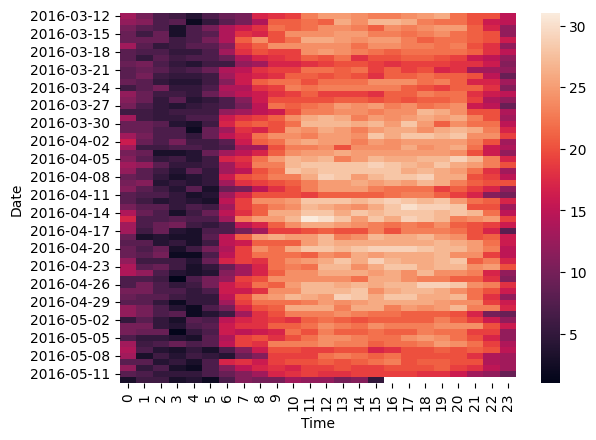

In [26]:
user_per_hour_per_day_pivot = user_per_hour_per_day.pivot(index='Date', columns='Time', values='Active')
sns.heatmap(user_per_hour_per_day_pivot)

### Total hours per user
In aggregate, we have 62 * 24 = 1488 hours for each user to wear the device. Let's calculate how many hours each user used the device.
<br> 50% of users wear the device at least 57% of the time, i.e. 849 hours in total. The box plot shows that the histogram of the total time is left-skewed, meaning that most users are located to the right of the average.

In [9]:
total_hour_per_user = (hourlyIntensities.groupby('Id')['Active'].sum() / 1488).round(2)
print("Mean total active hours:", total_hour_per_user.mean().round(2))
print("Median total active hours:", total_hour_per_user.median())
print("Minimum total active hours:", total_hour_per_user.min())
print("Maximum total active hours:", total_hour_per_user.max())


Mean total active hours: 0.5
Median total active hours: 0.57
Minimum total active hours: 0.0
Maximum total active hours: 0.8


Text(0.5, 1.0, 'Distribution of total hours each user wears the deive (percent)')

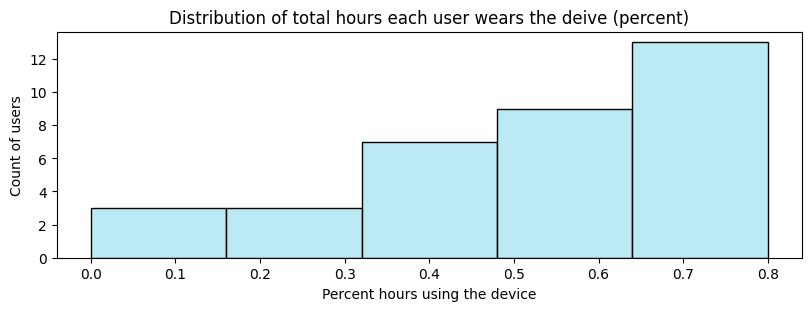

In [59]:
fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')
sns.histplot(total_hour_per_user, ax=ax, bins=5, color='#a5e4f2')
ax.set_xlabel('Percent hours using the device')
ax.set_ylabel('Count of users')
ax.set_title("Distribution of total hours each user wears the deive (percent)")


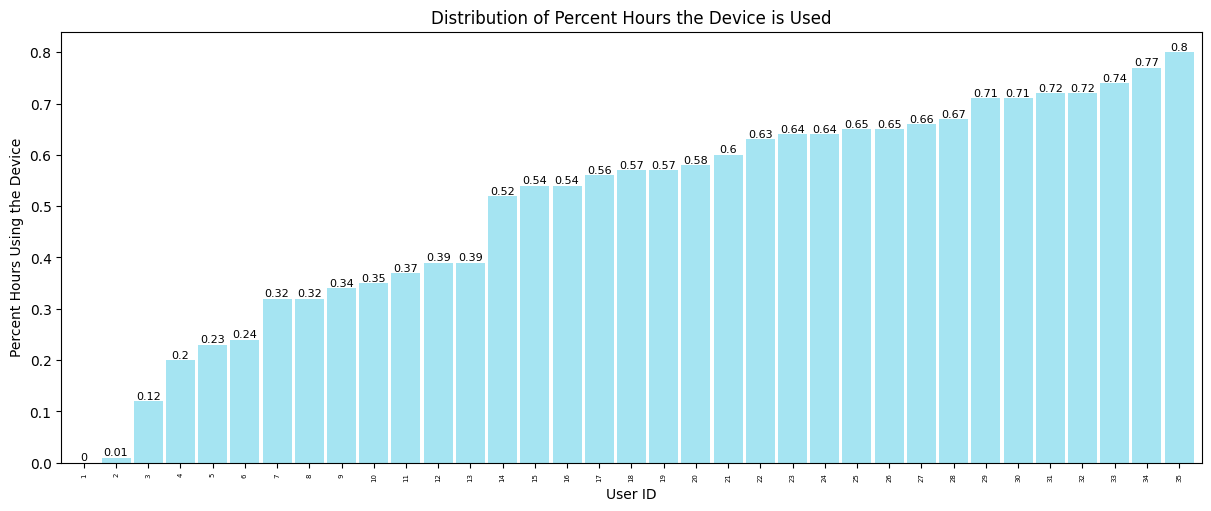

In [11]:
fig, ax = plt.subplots(figsize=(12, 5), layout='constrained')
total_hour_per_user.sort_values().plot.bar(ax=ax, color='#a5e4f2', width=0.9)
ax.set_xlabel('User ID')
ax.set_ylabel('Percent Hours Using the Device')
ax.set_title("Distribution of Percent Hours the Device is Used")
# ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.2)
ax.set_xticks(ticks=range(35), labels=range(1,36))
ax.xaxis.set_tick_params(labelsize=5)
# ax.axhline(42, color='grey', alpha=0.5)  # median position
ax.bar_label(ax.containers[0], fontsize=8);

### Intensity of activities

In [37]:
minuteIntensities = clean['minuteIntensitiesNarrow'].copy()
minuteIntensities['Date'] = minuteIntensities['Time'].dt.date
minuteIntensities['Time'] = minuteIntensities['Time'].dt.time
minuteIntensities['Active'] = minuteIntensities['Intensity'] > 0
minuteIntensities = minuteIntensities.reindex(columns=['Id', 'Date', 'Time', 'Intensity', 'Active'])
minuteIntensities.head()


,Id,Date,Time,Intensity,Active
0,1503960366,2016-03-12,00:00:00,0,False
1,1503960366,2016-03-12,00:01:00,0,False
2,1503960366,2016-03-12,00:02:00,0,False
3,1503960366,2016-03-12,00:03:00,0,False
4,1503960366,2016-03-12,00:04:00,0,False


It's very surprising to see that people are active in only 15% of their time. In the rest 85%, their intensity is zero. And only 2.5 percent of the time is spent on high intensity activities. This means that people use the device not only when doing excercise, but also in the long sedentary times.

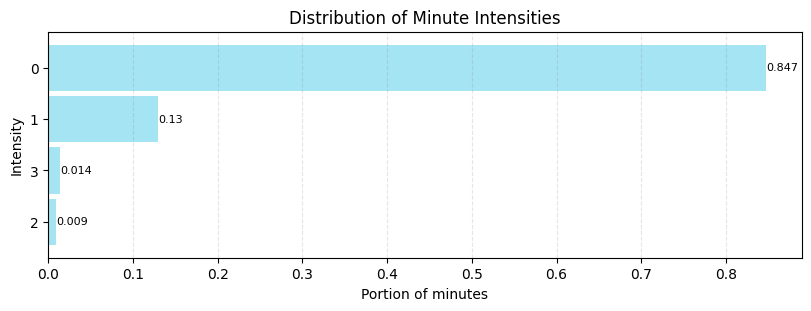

In [38]:
intensity_dist = minuteIntensities['Intensity'].value_counts(normalize=True).round(3).sort_values()

fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')
intensity_dist.plot.barh(ax=ax, color='#a5e4f2', width=0.9)
ax.set_xlabel('Portion of minutes')
ax.set_ylabel('Intensity')
ax.set_title("Distribution of Minute Intensities")
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.2)
ax.bar_label(ax.containers[0], fontsize=8);

Starting at 6:00 a.m., we have high intensities every two hours, the highest being between 17:30 and 18:00. That's probably when people finish work and go to the gym or exercise.

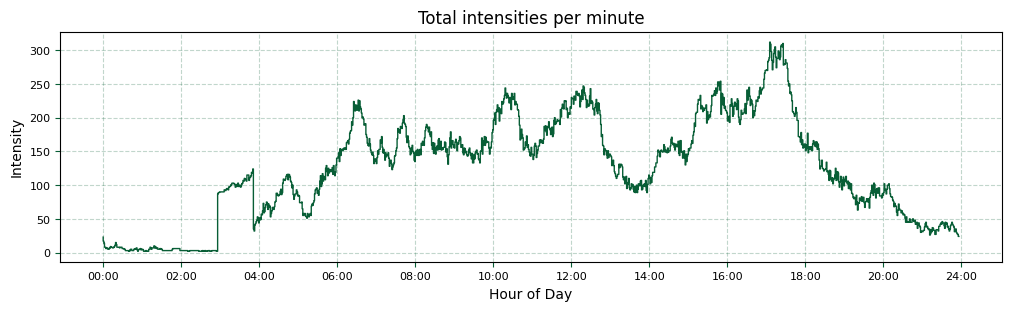

In [53]:
high_intensity = minuteIntensities[minuteIntensities['Intensity']>1]
intensity_time = high_intensity.groupby('Time')['Intensity'].sum()
# intensity_time.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,3), layout='constrained')
x = range(intensity_time.shape[0])
# x = intensity_time.index.astype(str)
y = intensity_time.values
ax.step(x, y, linewidth=1, color='#085e36')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Intensity')
ax.set_title("Total intensities per minute")
ax.yaxis.grid(True, linestyle='--', which='major', color='#085e36', alpha=.25)
ax.xaxis.grid(True, linestyle='--', which='major', color='#085e36', alpha=.25)
ax.set_xticks(range(0,24*60,120))
ax.set_xticklabels(['00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '24:00'])
ax.xaxis.set_tick_params(labelsize=8, color='#085e36')
ax.yaxis.set_tick_params(labelsize=8, color='#085e36')


## 5- Conclusion up to this point
**This analysis is not finished yet and I keep adding more questions and charts, nevertheless, here is my conclusion based on the analysis up to this point.**
<br>In general, the analysis shows that people love the device and are interested in using it. They wear it for many days and hours during the day, which means that the retention rate is high for this device and users have experienced the AHA moment of using this device. However, I believe that there is a lot of potential for improving the retention rate in terms of using the device for more days and hours. 
<br>As a hypothesis to be tested, I think if we communicate the value of the device more technically, and educate them about its capabilities and benefits for their health, they start using it as part of their healthy lifestyle, not only an accessory to be used during work hours and days.